In [1]:
from tgp.gp_predictor import GPPredictor
from tgp.rbf_kernel import RBFKernel
from tgp.matern_kernels import MaternKernel32, MaternKernel12
from tgp.brownian_kernel import BrownianKernel
from tgp.summed_kernel import SummedKernel
from tgp.bias_kernel import BiasKernel
from tgp.mlp_kernel import MLPKernel
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
#[0.01 3.  ]
#[0.01       0.08188141 0.46761428]
#-15078.82064999154
#13170.096365923968

#kernel = SummedKernel([
#    MaternKernel32(np.array([3.5566]), 0.344),
#    MaternKernel32(np.array([4.5202]), 0.378)
#])

#kernel = SummedKernel([
#    MaternKernel12(np.array([1.875]), 0.1851),
#    MaternKernel32(np.array([5.438]), 0.5199)
#])

#kernel = MLPKernel(np.array([1.48996238]), 9.62208874, 0.5888992)

kernel = SummedKernel([
    MLPKernel(np.array([0.90334729]), 4.26640103, 0.5604109),
    MLPKernel(np.array([9.39022399]), 9.4369357,  0.13954155)
])


#pred_x = predictor.X
#pred_s = predictor.s
#pred_e = predictor.e

In [37]:
#computed = kernel.calculate(pred_x[pred_s[0]:pred_e[0]], pred_x[pred_s[0]:pred_e[0]])

In [38]:
# Get some data
from tdata.datasets.oncourt_dataset import OnCourtDataset

In [7]:
dataset = OnCourtDataset()

/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
df = dataset.get_stats_df()

In [30]:
recent = df[df['year'] >= 2016]

In [31]:
winners = recent['winner'].values
losers = recent['loser'].values
days_since_start = (recent['start_date'] - 
                    recent['start_date'].min()).dt.days.values

In [39]:
predictor = GPPredictor(kernel)
predictor.fit(winners, losers, days_since_start)

-59983.031600936956


In [40]:
# Look at some players
fhat = predictor.f_hat

In [41]:

from datetime import timedelta

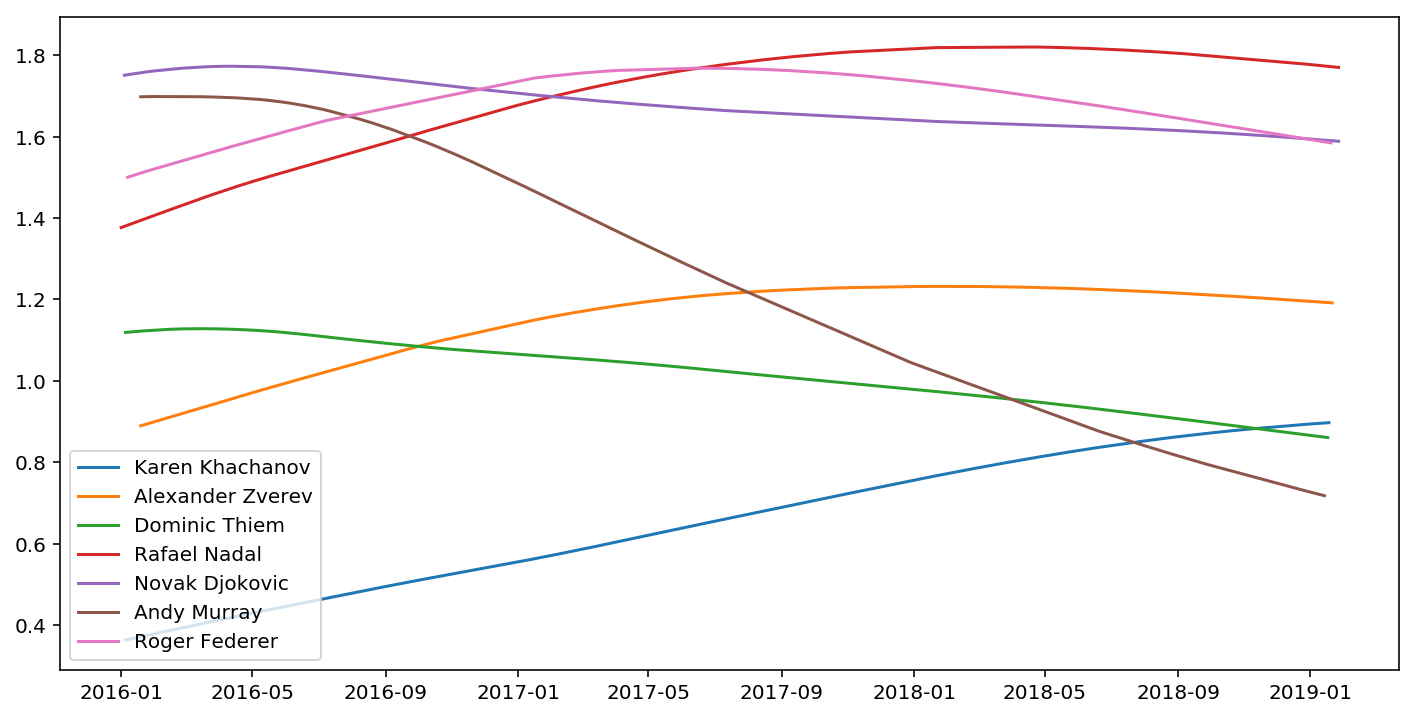

In [42]:
# Find the player of interest
players = ['Karen Khachanov', 'Alexander Zverev', 'Dominic Thiem', 'Rafael Nadal', 
           'Novak Djokovic', 'Andy Murray', 'Roger Federer']

for p in players:

    p_id = predictor.encoder.transform([p])[0]

    p_s = predictor.s[p_id]
    p_e = predictor.e[p_id]

    fs = fhat[p_s:p_e]
    x = predictor.X[p_s:p_e] * predictor.divide_by

    dates = [recent['start_date'].min() + timedelta(days=cur_x)
             for cur_x in x.reshape(-1)]

    plt.plot(dates, fs, label=p)

plt.legend()
plt.gcf().set_size_inches(12, 6)

In [ ]:
# Find final ratings for everyone
final_ratings = {cur_player: fhat[cur_x - 1] for cur_x, cur_player, cur_start in zip(predictor.e, predictor.encoder.classes_, predictor.s)}

In [ ]:
import pandas as pd

pd.Series(final_ratings).sort_values(ascending=False)

In [ ]:
predictor.predict('Simone Bolelli', 200)